In [64]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.cm import get_cmap
plt.rcParams["figure.figsize"]=(15,8)

In [65]:
g = 9.8
theta = np.radians(30)  
gamma = 0.7 
H = 10.0  

In [66]:
def system (t, y,m):
    x,y,vx,vy = y
    ax=g*np.sin(theta)-(gamma/m)*(vx**2)
    ay=0
    return [vx,vy,ax,ay]

In [67]:
masas = np.linspace(1,10,10)
tiempos_caída = []
soluciones = []
t_max = []

for M in masas:
    m_total = 0+M
    sol = solve_ivp(system, t_span = (0, 10), y0 = [0.,H,0.,0.], args=(m_total,), method='RK45',max_step=0.001)
    y = H - 0.5 * sol.y[2] * sol.t**2 
    tiempo_y0 = sol.t[np.argmax(y <= 0)]  # Tiempo cuando toca el piso
    tiempos_caída.append(tiempo_y0)
    soluciones.append(sol)
    t_max.append(sol.t[-1])

Text(0, 0.5, 'Tiempo (s)')

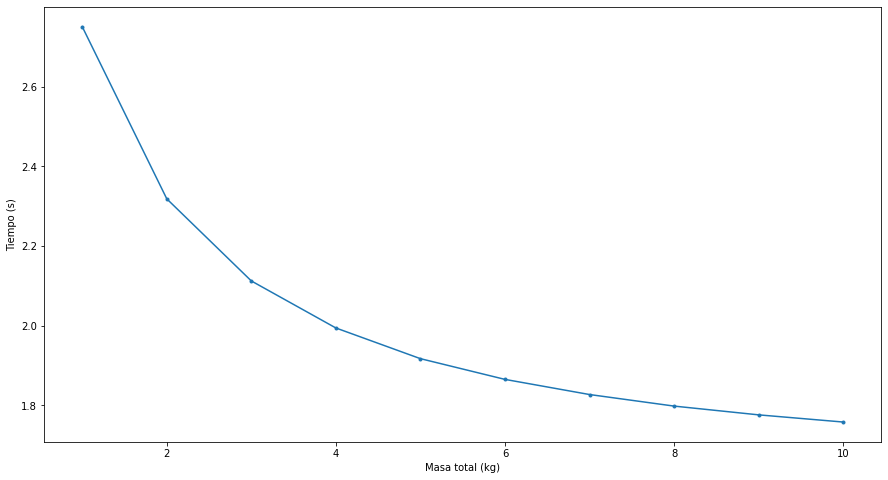

In [68]:
plt.plot(masas,tiempos_caída,".-")
plt.xlabel("Masa total (kg)")
plt.ylabel("Tiempo (s)")

Bono: animación

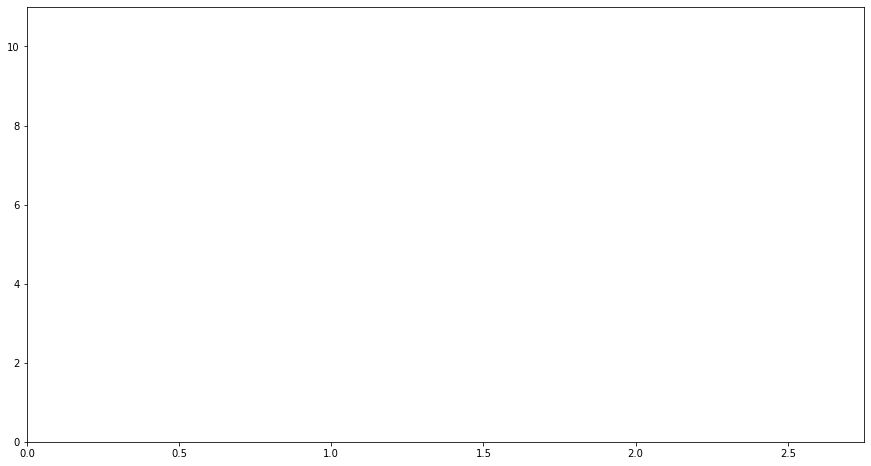

In [69]:
colors = get_cmap('viridis')(np.linspace(0, 1, len(masas)))
fig, ax = plt.subplots()
ax.set_xlim(0, max(tiempos_caída))  
ax.set_ylim(0, H + 1) 
points = [ax.plot([], [], 'o', color=colors[i], label=f"Masa={masas[i]:.2f}kg")[0] for i in range(len(masas))]

In [70]:
def animate(frame):
    for i, sol in enumerate(soluciones):
        if frame < len(sol.t):
            points[i].set_data(sol.t[frame], H - 0.5 * sol.y[2, frame] * sol.t[frame]**2)

In [71]:
ani = animation.FuncAnimation(fig, animate, frames=100, interval=50)

No handles with labels found to put in legend.


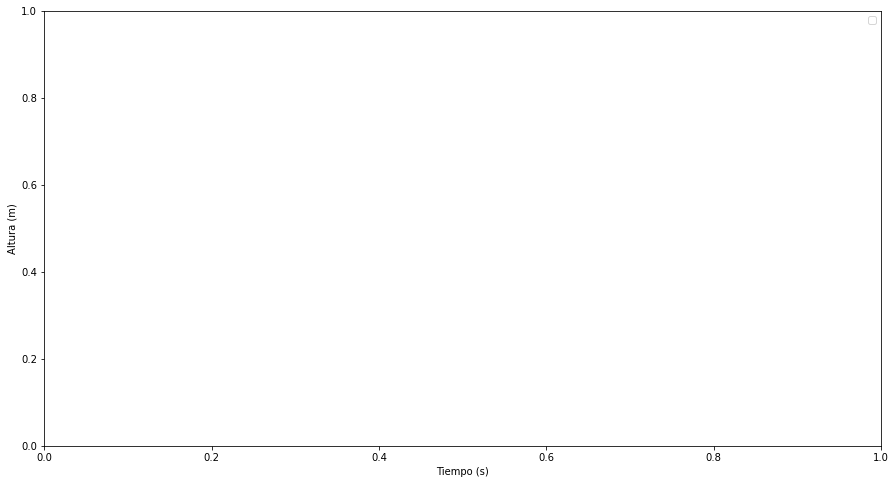

In [72]:
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")
plt.show()

In [73]:
ani

In [86]:
t_dense = np.linspace(sol.t[0],sol.t[-2],300)
for M in masas:
    m_total = 0+M
    sol = solve_ivp(system, t_span = t_dense, y0 = [0.,H,0.,0.], args=(m_total,), method='RK45',max_step=0.001)
    y = H - 0.5 * sol.y[2] * sol.t**2 
    tiempo_y0 = sol.t[np.argmax(y <= 0)]  # Tiempo cuando toca el piso
    tiempos_caída.append(tiempo_y0)
    soluciones.append(sol)
    t_max.append(sol.t[-1])

In [89]:
# interpolación
Y_dense = sol.sol(t_dense)
x_dense,y_dense,vx_dense,vy_dense = Y_dense

TypeError: 'NoneType' object is not callable

In [48]:
p = plt.scatter(x_dense,y_dense,c=t_dense)
plt.colorbar(p,label="tiempo")

NameError: name 'x_dense' is not defined

In [75]:
fig = plt.figure();
plt.xlim(x_dense.min(),x_dense.max()+0.5)
plt.ylim(y_dense.min(),y_dense.max()+0.5)

point = plt.scatter(*[0.,H,0.,0.][:2])
line = plt.plot(*[0.,H,0.,0.][:2])[0]

NameError: name 'x_dense' is not defined

<Figure size 1080x576 with 0 Axes>

In [50]:
def func(frame):
    # update scatter
    point.set_offsets(Y_dense[:2,frame])
    # update line
    if frame>1:
        line.set_data(x_dense[:frame+1],y_dense[:frame+1])
    return point,line

In [51]:
anim = animation.FuncAnimation(fig,func,frames=range(len(t_dense)),interval=10)

In [52]:
anim